In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("train.csv")

In [4]:
X = df.drop(["ID_code","target"], axis = 1)
y = df.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
# params = {}
# params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 15
# params['min_data'] = 80
# params['max_depth'] = -1
params_tuned = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}
clf = lgb.train(params_tuned, d_train, 100)

In [8]:
#Prediction
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,50000):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [9]:
# accuracy=accuracy_score(y_test,y_pred.round(), normalize=False)
# print(accuracy)

# cm = confusion_matrix(y_test, y_pred.round(), normalize=False)
# # print(cm)

ras = roc_auc_score(y_test, y_pred)
print(ras)

0.5


In [ ]:
# import matplotlib.pyplot as plt
# fig, ax1 = plt.subplots(figsize=(16,9))

# color = 'tab:red'
# ax1.set_xlabel('x_test')
# ax1.set_ylabel('y_test', color=color)
# ax1.plot(x_test, y_test, color=color, marker = "o")
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('y_pred', color=color)  # we already handled the x-label with ax1
# ax2.plot(x_test, y_pred, color=color, marker = "+")
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [79]:
dfff = pd.DataFrame(x_test)
x_sample = dfff.iloc[0:50000, :]


In [72]:
import pickle


In [1]:
xAxiz = x_test[0:499,0]
y1Axiz = y_test[0:499]
y2Axiz = y_pred[0:499]
plt.figure(figsize=(20,10))
plt.scatter(xAxiz, y1Axiz, color='r')
plt.scatter(xAxiz, y2Axiz, color='g')
plt.xlabel('x_test')
plt.ylabel('target')
plt.show()

NameError: name 'x_test' is not defined

In [74]:
filename = 'LightGBM.sav'
pickle.dump(clf, open(filename, 'wb'))


In [76]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.roc_auc_score(x_test, y_test)
print(result)

AttributeError: 'Booster' object has no attribute 'roc_auc_score'

In [85]:
print(x_test[0:499])

[[-1.50618531 -0.56745994 -0.38761945 ...  1.27666196  0.90299097
  -0.27148783]
 [-1.25042839  0.32816461 -0.56472018 ... -1.23900756  0.74492034
  -0.13518745]
 [ 0.49412278 -0.68513071  1.00825077 ...  0.74679032  1.96448858
  -0.74480465]
 ...
 [-0.78545171  0.88276089 -0.56078292 ... -0.67191577 -1.1528916
  -1.11056732]
 [ 0.59173892  0.35420407  2.50289307 ...  1.73817007 -0.44178996
  -0.59089458]
 [ 0.4059523  -0.91120064  0.91254521 ...  0.68482909  0.37400478
  -0.97644062]]


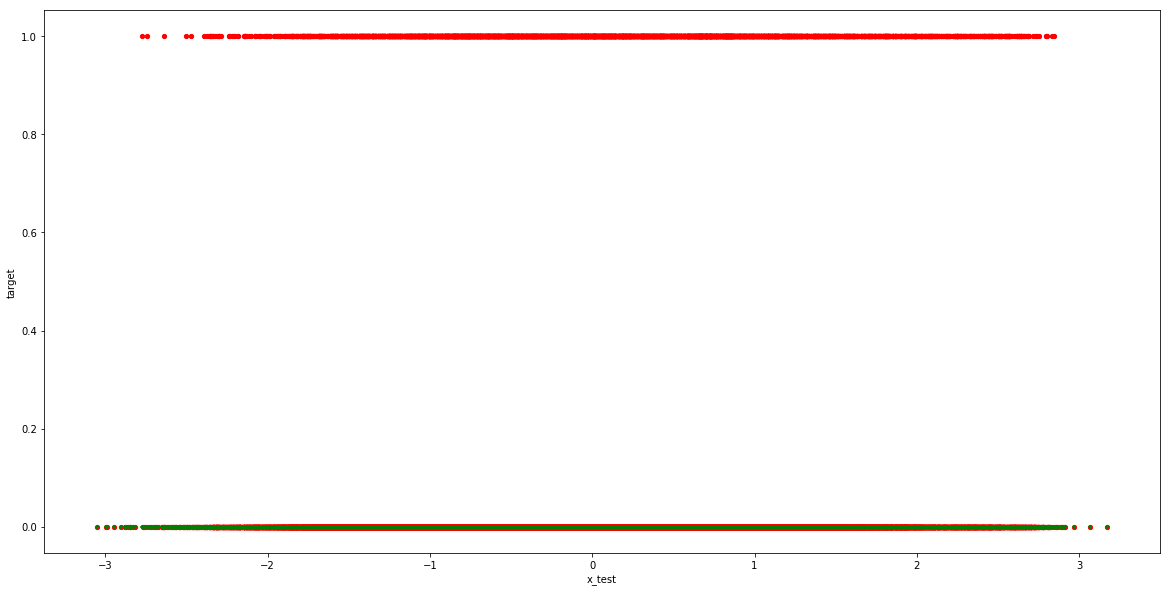

In [12]:
import matplotlib.pyplot as plt
xAxiz = x_test[:,0]
# y1Axiz = y_test[0:499]
# y2Axiz = y_pred[0:499]
plt.figure(figsize=(20,10))
plt.scatter(xAxiz, y_test, color='r', marker = "o", s = 18)
plt.scatter(xAxiz, y_pred, color='g', marker = "+", s = 18)
# plt.xlim(0, None)
plt.xlabel('x_test')
plt.ylabel('target')
plt.show()

In [16]:
plt.savefig('x_test.png')

<Figure size 432x288 with 0 Axes>

In [3]:
# test = pd.read_csv("test.csv")

In [11]:
# test1 = test.drop(["ID_code"], axis = 1)

In [22]:
# y_pred=clf.predict(test1)
# #convert into binary values
# for i in range(0,200000):
#     if y_pred[i]>=.5:       # setting threshold to .5
#        y_pred[i]=1
#     else:  
#        y_pred[i]=0

In [23]:
# submission1 = pd.DataFrame({"ID_code": test.ID_code.values})
# submission1["target"] = y_pred
# submission1.to_csv("submission1.csv", index=False)

In [17]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
param = {
    'num_leaves': 18,
     'max_bin': 63,
     'min_data_in_leaf': 5,
     'learning_rate': 0.010614430970330217,
     'min_sum_hessian_in_leaf': 0.0093586657313989123,
     'feature_fraction': 0.056701788569420042,
     'lambda_l1': 0.060222413158420585,
     'lambda_l2': 4.6580550589317573,
     'min_gain_to_split': 0.29588543202055562,
     'max_depth': 49,
     'save_binary': True,
     'seed': 1337,
     'feature_fraction_seed': 1337,
     'bagging_seed': 1337,
     'drop_seed': 1337,
     'data_random_seed': 1337,
     'objective': 'binary',
     'boosting_type': 'gbdt',
     'verbose': 1,
     'metric': 'auc',
     'is_unbalance': True,
     'boost_from_average': False
} 
 
clf = lgb.train(param, d_train, 100)

In [18]:
#Prediction
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,50000):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [19]:
ras = roc_auc_score(y_test, y_pred)
print(ras)

0.7744453292545088
